# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 19524 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past)


  0% (    1 of 19524) |            | Elapsed Time: 0:00:27 ETA:  6 days, 7:10:28

  0% (   78 of 19524) |                    | Elapsed Time: 0:00:28 ETA:  0:03:47

  0% (  163 of 19524) |                    | Elapsed Time: 0:00:29 ETA:  0:03:33

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:30 ETA:  0:03:37

  1% (  325 of 19524) |                    | Elapsed Time: 0:00:31 ETA:  0:03:36

  2% (  394 of 19524) |                    | Elapsed Time: 0:00:32 ETA:  0:03:41

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:34 ETA:  0:03:38

  2% (  578 of 19524) |                    | Elapsed Time: 0:00:35 ETA:  0:03:32

  3% (  658 of 19524) |                    | Elapsed Time: 0:00:36 ETA:  0:03:30

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:37 ETA:  0:03:29

  4% (  815 of 19524) |                    | Elapsed Time: 0:00:38 ETA:  0:03:26

  4% (  899 of 19524) |                    | Elapsed Time: 0:00:39 ETA:  0:03:23

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:40 ETA:  0:03:21

  5% ( 1063 of 19524) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:14

  5% ( 1150 of 19524) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:10

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:09

  6% ( 1307 of 19524) |#                   | Elapsed Time: 0:00:43 ETA:  0:03:09

  7% ( 1391 of 19524) |#                   | Elapsed Time: 0:00:44 ETA:  0:03:07

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:45 ETA:  0:03:07

  7% ( 1546 of 19524) |#                   | Elapsed Time: 0:00:46 ETA:  0:03:06

  8% ( 1602 of 19524) |#                   | Elapsed Time: 0:00:48 ETA:  0:03:28

  8% ( 1681 of 19524) |#                   | Elapsed Time: 0:00:49 ETA:  0:03:29

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:49 ETA:  0:03:32

  9% ( 1791 of 19524) |#                   | Elapsed Time: 0:00:50 ETA:  0:03:33

  9% ( 1871 of 19524) |#                   | Elapsed Time: 0:00:51 ETA:  0:03:33

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:52 ETA:  0:03:39

 10% ( 2033 of 19524) |##                  | Elapsed Time: 0:00:53 ETA:  0:03:39

 10% ( 2111 of 19524) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:39

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:08

 11% ( 2280 of 19524) |##                  | Elapsed Time: 0:00:56 ETA:  0:03:06

 12% ( 2357 of 19524) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:07

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:00:58 ETA:  0:03:09

 12% ( 2518 of 19524) |##                  | Elapsed Time: 0:01:00 ETA:  0:03:09

 13% ( 2597 of 19524) |##                  | Elapsed Time: 0:01:01 ETA:  0:03:09

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:01:02 ETA:  0:03:09

 14% ( 2768 of 19524) |##                  | Elapsed Time: 0:01:03 ETA:  0:03:05

 14% ( 2852 of 19524) |##                  | Elapsed Time: 0:01:04 ETA:  0:03:04

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:00

 15% ( 3015 of 19524) |###                 | Elapsed Time: 0:01:06 ETA:  0:02:54

 15% ( 3091 of 19524) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:55

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:52

 16% ( 3260 of 19524) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:47

 17% ( 3352 of 19524) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:43

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:01:10 ETA:  0:02:42

 17% ( 3503 of 19524) |###                 | Elapsed Time: 0:01:11 ETA:  0:02:40

 18% ( 3594 of 19524) |###                 | Elapsed Time: 0:01:12 ETA:  0:02:37

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:01:13 ETA:  0:02:36

 19% ( 3752 of 19524) |###                 | Elapsed Time: 0:01:14 ETA:  0:02:30

 19% ( 3842 of 19524) |###                 | Elapsed Time: 0:01:15 ETA:  0:02:25

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:01:16 ETA:  0:02:24

 20% ( 3995 of 19524) |####                | Elapsed Time: 0:01:17 ETA:  0:02:22

 20% ( 4085 of 19524) |####                | Elapsed Time: 0:01:18 ETA:  0:02:22

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:01:19 ETA:  0:02:20

 21% ( 4237 of 19524) |####                | Elapsed Time: 0:01:20 ETA:  0:02:18

 22% ( 4323 of 19524) |####                | Elapsed Time: 0:01:21 ETA:  0:02:18

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:01:21 ETA:  0:02:18

 22% ( 4477 of 19524) |####                | Elapsed Time: 0:01:22 ETA:  0:02:19

 23% ( 4563 of 19524) |####                | Elapsed Time: 0:01:23 ETA:  0:02:19

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:01:24 ETA:  0:02:20

 24% ( 4723 of 19524) |####                | Elapsed Time: 0:01:25 ETA:  0:02:20

 24% ( 4804 of 19524) |####                | Elapsed Time: 0:01:26 ETA:  0:02:22

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:53

 25% ( 4959 of 19524) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:55

 25% ( 5031 of 19524) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:59

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:01:31 ETA:  0:03:03

 26% ( 5209 of 19524) |#####               | Elapsed Time: 0:01:32 ETA:  0:03:02

 27% ( 5284 of 19524) |#####               | Elapsed Time: 0:01:33 ETA:  0:03:06

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:32

 27% ( 5456 of 19524) |#####               | Elapsed Time: 0:01:35 ETA:  0:02:28

 28% ( 5539 of 19524) |#####               | Elapsed Time: 0:01:36 ETA:  0:02:25

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:01:37 ETA:  0:02:20

 29% ( 5698 of 19524) |#####               | Elapsed Time: 0:01:38 ETA:  0:02:20

 29% ( 5781 of 19524) |#####               | Elapsed Time: 0:01:39 ETA:  0:02:19

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:40 ETA:  0:02:18

 30% ( 5935 of 19524) |######              | Elapsed Time: 0:01:41 ETA:  0:02:16

 30% ( 6022 of 19524) |######              | Elapsed Time: 0:01:42 ETA:  0:02:13

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:43 ETA:  0:02:12

 31% ( 6188 of 19524) |######              | Elapsed Time: 0:01:44 ETA:  0:02:11

 32% ( 6277 of 19524) |######              | Elapsed Time: 0:01:45 ETA:  0:02:08

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:01:46 ETA:  0:02:06

 32% ( 6426 of 19524) |######              | Elapsed Time: 0:01:47 ETA:  0:02:06

 33% ( 6519 of 19524) |######              | Elapsed Time: 0:01:48 ETA:  0:02:02

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:01:49 ETA:  0:02:01

 34% ( 6676 of 19524) |######              | Elapsed Time: 0:01:50 ETA:  0:01:57

 34% ( 6764 of 19524) |######              | Elapsed Time: 0:01:51 ETA:  0:01:56

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:55

 35% ( 6921 of 19524) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:54

 35% ( 6996 of 19524) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:57

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:01:55 ETA:  0:01:57

 36% ( 7166 of 19524) |#######             | Elapsed Time: 0:01:56 ETA:  0:01:54

 37% ( 7251 of 19524) |#######             | Elapsed Time: 0:01:57 ETA:  0:01:55

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:58 ETA:  0:01:56

 37% ( 7412 of 19524) |#######             | Elapsed Time: 0:01:59 ETA:  0:01:54

 38% ( 7494 of 19524) |#######             | Elapsed Time: 0:02:00 ETA:  0:01:55

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:02:01 ETA:  0:01:57

 39% ( 7647 of 19524) |#######             | Elapsed Time: 0:02:02 ETA:  0:01:58

 39% ( 7727 of 19524) |#######             | Elapsed Time: 0:02:03 ETA:  0:01:55

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:02:04 ETA:  0:01:53

 40% ( 7894 of 19524) |########            | Elapsed Time: 0:02:05 ETA:  0:01:53

 40% ( 7982 of 19524) |########            | Elapsed Time: 0:02:06 ETA:  0:01:51

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:02:07 ETA:  0:01:48

 41% ( 8141 of 19524) |########            | Elapsed Time: 0:02:08 ETA:  0:01:48

 42% ( 8229 of 19524) |########            | Elapsed Time: 0:02:09 ETA:  0:01:45

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:02:09 ETA:  0:01:41

 42% ( 8383 of 19524) |########            | Elapsed Time: 0:02:10 ETA:  0:01:38

 43% ( 8472 of 19524) |########            | Elapsed Time: 0:02:11 ETA:  0:01:34

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:02:12 ETA:  0:01:33

 44% ( 8629 of 19524) |########            | Elapsed Time: 0:02:13 ETA:  0:01:31

 44% ( 8708 of 19524) |########            | Elapsed Time: 0:02:14 ETA:  0:01:33

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:31

 45% ( 8860 of 19524) |#########           | Elapsed Time: 0:02:17 ETA:  0:02:04

 45% ( 8940 of 19524) |#########           | Elapsed Time: 0:02:18 ETA:  0:02:06

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:02:19 ETA:  0:02:10

 46% ( 9118 of 19524) |#########           | Elapsed Time: 0:02:20 ETA:  0:02:10

 47% ( 9200 of 19524) |#########           | Elapsed Time: 0:02:21 ETA:  0:02:10

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:02:22 ETA:  0:02:11

 47% ( 9358 of 19524) |#########           | Elapsed Time: 0:02:23 ETA:  0:02:08

 48% ( 9445 of 19524) |#########           | Elapsed Time: 0:02:24 ETA:  0:02:07

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:02:25 ETA:  0:01:29

 49% ( 9600 of 19524) |#########           | Elapsed Time: 0:02:26 ETA:  0:01:28

 49% ( 9690 of 19524) |#########           | Elapsed Time: 0:02:27 ETA:  0:01:24

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:22

 50% ( 9850 of 19524) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:22

 50% ( 9933 of 19524) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:20

 51% (10007 of 19524) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:20

 51% (10090 of 19524) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:20

 52% (10176 of 19524) |##########          | Elapsed Time: 0:02:33 ETA:  0:01:19

 52% (10251 of 19524) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:18

 52% (10338 of 19524) |##########          | Elapsed Time: 0:02:35 ETA:  0:01:16

 53% (10417 of 19524) |##########          | Elapsed Time: 0:02:36 ETA:  0:01:18

 53% (10495 of 19524) |##########          | Elapsed Time: 0:02:37 ETA:  0:01:18

 54% (10583 of 19524) |##########          | Elapsed Time: 0:02:38 ETA:  0:01:17

 54% (10671 of 19524) |##########          | Elapsed Time: 0:02:39 ETA:  0:01:14

 55% (10739 of 19524) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:11

 55% (10825 of 19524) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:09

 55% (10908 of 19524) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:09

 56% (10983 of 19524) |###########         | Elapsed Time: 0:02:43 ETA:  0:01:08

 56% (11067 of 19524) |###########         | Elapsed Time: 0:02:44 ETA:  0:01:08

 57% (11152 of 19524) |###########         | Elapsed Time: 0:02:45 ETA:  0:01:05

 57% (11227 of 19524) |###########         | Elapsed Time: 0:02:46 ETA:  0:01:04

 57% (11312 of 19524) |###########         | Elapsed Time: 0:02:47 ETA:  0:01:04

 58% (11395 of 19524) |###########         | Elapsed Time: 0:02:48 ETA:  0:01:05

 58% (11471 of 19524) |###########         | Elapsed Time: 0:02:49 ETA:  0:01:05

 59% (11558 of 19524) |###########         | Elapsed Time: 0:02:50 ETA:  0:01:03

 59% (11644 of 19524) |###########         | Elapsed Time: 0:02:51 ETA:  0:01:01

 60% (11715 of 19524) |############        | Elapsed Time: 0:02:51 ETA:  0:01:00

 60% (11801 of 19524) |############        | Elapsed Time: 0:02:52 ETA:  0:00:58

 60% (11884 of 19524) |############        | Elapsed Time: 0:02:53 ETA:  0:00:58

 61% (11959 of 19524) |############        | Elapsed Time: 0:02:54 ETA:  0:00:56

 61% (12043 of 19524) |############        | Elapsed Time: 0:02:55 ETA:  0:00:55

 62% (12130 of 19524) |############        | Elapsed Time: 0:02:56 ETA:  0:00:53

 62% (12203 of 19524) |############        | Elapsed Time: 0:02:57 ETA:  0:00:52

 62% (12285 of 19524) |############        | Elapsed Time: 0:02:58 ETA:  0:00:53

 63% (12370 of 19524) |############        | Elapsed Time: 0:02:59 ETA:  0:00:52

 63% (12447 of 19524) |############        | Elapsed Time: 0:03:00 ETA:  0:00:51

 64% (12524 of 19524) |############        | Elapsed Time: 0:03:01 ETA:  0:00:53

 64% (12610 of 19524) |############        | Elapsed Time: 0:03:02 ETA:  0:00:51

 65% (12691 of 19524) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:51

 65% (12777 of 19524) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:50

 65% (12866 of 19524) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:48

 66% (12935 of 19524) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:46

 66% (13020 of 19524) |#############       | Elapsed Time: 0:03:07 ETA:  0:00:44

 67% (13106 of 19524) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:43

 67% (13179 of 19524) |#############       | Elapsed Time: 0:03:09 ETA:  0:00:43

 67% (13264 of 19524) |#############       | Elapsed Time: 0:03:10 ETA:  0:00:40

 68% (13349 of 19524) |#############       | Elapsed Time: 0:03:11 ETA:  0:00:39

 68% (13423 of 19524) |#############       | Elapsed Time: 0:03:12 ETA:  0:00:38

 69% (13507 of 19524) |#############       | Elapsed Time: 0:03:13 ETA:  0:00:38

 69% (13591 of 19524) |#############       | Elapsed Time: 0:03:14 ETA:  0:00:38

 70% (13667 of 19524) |##############      | Elapsed Time: 0:03:15 ETA:  0:00:39

 70% (13751 of 19524) |##############      | Elapsed Time: 0:03:16 ETA:  0:00:38

 70% (13770 of 19524) |##############      | Elapsed Time: 0:03:18 ETA:  0:01:25

 70% (13844 of 19524) |##############      | Elapsed Time: 0:03:19 ETA:  0:01:26

 71% (13911 of 19524) |##############      | Elapsed Time: 0:03:19 ETA:  0:01:29

 71% (13981 of 19524) |##############      | Elapsed Time: 0:03:20 ETA:  0:01:35

 72% (14059 of 19524) |##############      | Elapsed Time: 0:03:21 ETA:  0:01:35

 72% (14155 of 19524) |##############      | Elapsed Time: 0:03:23 ETA:  0:01:43

 72% (14241 of 19524) |##############      | Elapsed Time: 0:03:24 ETA:  0:01:40

 73% (14324 of 19524) |##############      | Elapsed Time: 0:03:25 ETA:  0:01:40

 73% (14399 of 19524) |##############      | Elapsed Time: 0:03:25 ETA:  0:00:40

 74% (14484 of 19524) |##############      | Elapsed Time: 0:03:26 ETA:  0:00:35

 74% (14564 of 19524) |##############      | Elapsed Time: 0:03:28 ETA:  0:00:34

 75% (14644 of 19524) |###############     | Elapsed Time: 0:03:28 ETA:  0:00:27

 75% (14731 of 19524) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:23

 75% (14816 of 19524) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:21

 76% (14888 of 19524) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:20

 76% (14977 of 19524) |###############     | Elapsed Time: 0:03:32 ETA:  0:00:18

 77% (15061 of 19524) |###############     | Elapsed Time: 0:03:33 ETA:  0:00:17

 77% (15132 of 19524) |###############     | Elapsed Time: 0:03:34 ETA:  0:00:17

 77% (15217 of 19524) |###############     | Elapsed Time: 0:03:35 ETA:  0:00:16

 78% (15303 of 19524) |###############     | Elapsed Time: 0:03:36 ETA:  0:00:12

 78% (15376 of 19524) |###############     | Elapsed Time: 0:03:37 ETA:  0:00:11

 79% (15462 of 19524) |###############     | Elapsed Time: 0:03:38 ETA:  0:00:10

 79% (15544 of 19524) |###############     | Elapsed Time: 0:03:39 ETA:  0:00:10

 80% (15620 of 19524) |################    | Elapsed Time: 0:03:40 ETA:  0:00:10

 80% (15699 of 19524) |################    | Elapsed Time: 0:03:41 ETA:  0:00:12

 80% (15783 of 19524) |################    | Elapsed Time: 0:03:42 ETA:  0:00:11

 81% (15864 of 19524) |################    | Elapsed Time: 0:03:43 ETA:  0:00:11

 81% (15947 of 19524) |################    | Elapsed Time: 0:03:44 ETA:  0:00:10

 82% (16030 of 19524) |################    | Elapsed Time: 0:03:45 ETA:  0:00:10

 82% (16108 of 19524) |################    | Elapsed Time: 0:03:46 ETA:  0:00:09

 82% (16191 of 19524) |################    | Elapsed Time: 0:03:47 ETA:  0:00:09

 83% (16278 of 19524) |################    | Elapsed Time: 0:03:48 ETA:  0:00:06

 83% (16352 of 19524) |################    | Elapsed Time: 0:03:49 ETA:  0:00:05

 84% (16433 of 19524) |################    | Elapsed Time: 0:03:50 ETA:  0:00:04

 84% (16513 of 19524) |################    | Elapsed Time: 0:03:51 ETA:  0:00:04

 85% (16596 of 19524) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:01

 85% (16681 of 19524) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:00

 85% (16761 of 19524) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 86% (16840 of 19524) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 86% (16925 of 19524) |#################   | Elapsed Time: 0:03:56 ETA:  0:00:00

 87% (17008 of 19524) |#################   | Elapsed Time: 0:03:57 ETA:  0:00:00

 87% (17084 of 19524) |#################   | Elapsed Time: 0:03:58 ETA:  0:00:00

 87% (17167 of 19524) |#################   | Elapsed Time: 0:03:59 ETA:  0:00:00

 88% (17250 of 19524) |#################   | Elapsed Time: 0:04:00 ETA:  0:00:00

 88% (17328 of 19524) |#################   | Elapsed Time: 0:04:00 ETA:  0:00:00

 89% (17413 of 19524) |#################   | Elapsed Time: 0:04:02 ETA:  0:00:00

 89% (17495 of 19524) |#################   | Elapsed Time: 0:04:03 ETA:  0:00:00

 90% (17572 of 19524) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 90% (17653 of 19524) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 90% (17738 of 19524) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 91% (17816 of 19524) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 91% (17897 of 19524) |##################  | Elapsed Time: 0:04:07 ETA:  0:00:00

 92% (17982 of 19524) |##################  | Elapsed Time: 0:04:08 ETA:  0:00:00

 92% (18060 of 19524) |##################  | Elapsed Time: 0:04:09 ETA:  0:00:00

 92% (18145 of 19524) |##################  | Elapsed Time: 0:04:10 ETA:  0:00:00

 93% (18230 of 19524) |##################  | Elapsed Time: 0:04:11 ETA:  0:00:00

 93% (18304 of 19524) |##################  | Elapsed Time: 0:04:12 ETA:  0:00:00

 94% (18379 of 19524) |##################  | Elapsed Time: 0:04:13 ETA:  0:00:00

 94% (18460 of 19524) |##################  | Elapsed Time: 0:04:14 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 95% (18633 of 19524) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 95% (18715 of 19524) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:04:18 ETA:  0:00:00

 96% (18877 of 19524) |################### | Elapsed Time: 0:04:19 ETA:  0:00:00

 97% (18955 of 19524) |################### | Elapsed Time: 0:04:20 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:04:21 ETA:  0:00:00

 97% (19114 of 19524) |################### | Elapsed Time: 0:04:22 ETA:  0:00:00

 98% (19199 of 19524) |################### | Elapsed Time: 0:04:23 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:04:24 ETA:  0:00:00

 99% (19359 of 19524) |################### | Elapsed Time: 0:04:25 ETA:  0:00:00

 99% (19440 of 19524) |################### | Elapsed Time: 0:04:26 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:04:27 Time: 0:04:27


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

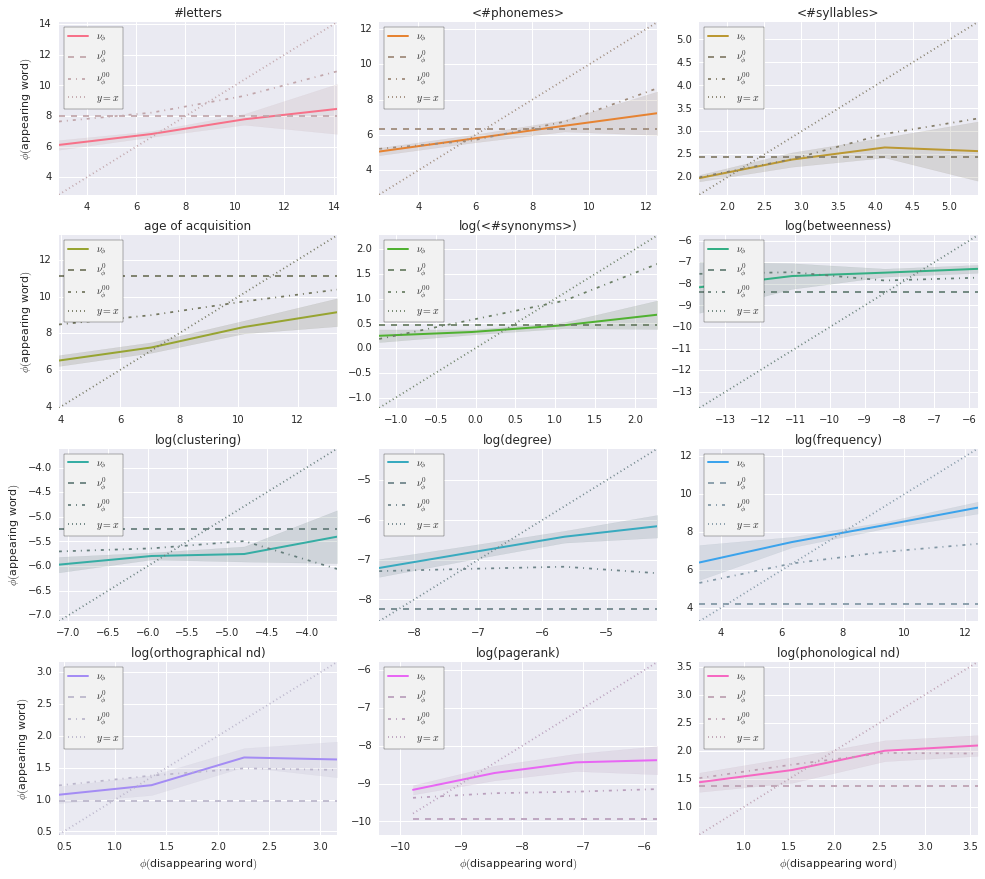

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

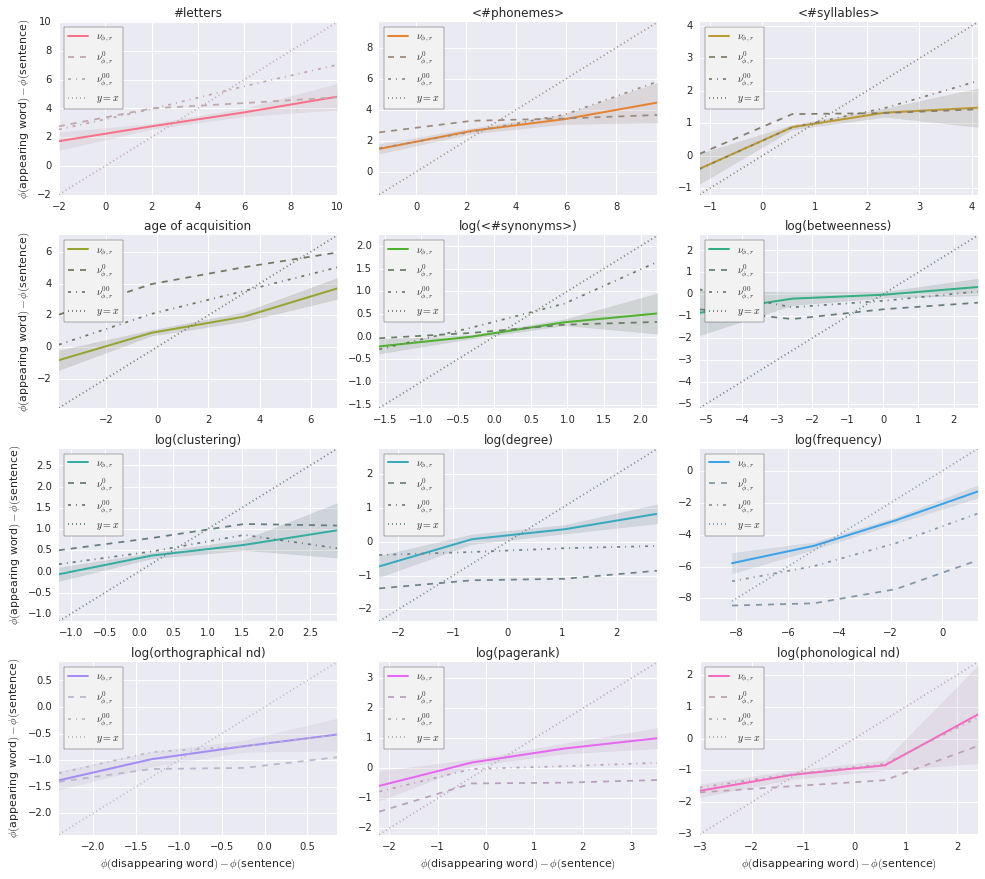

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

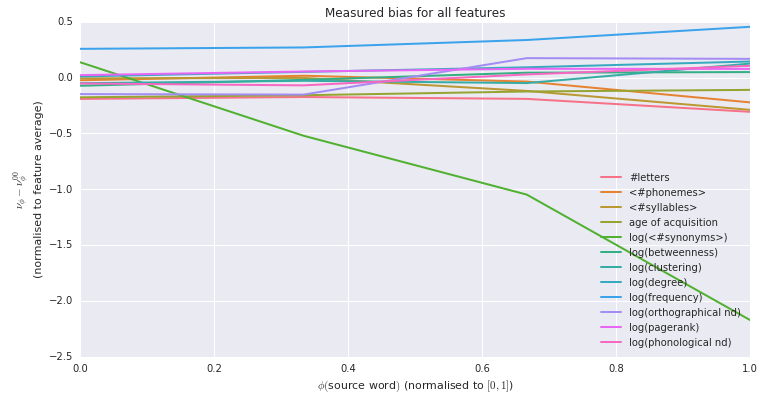

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

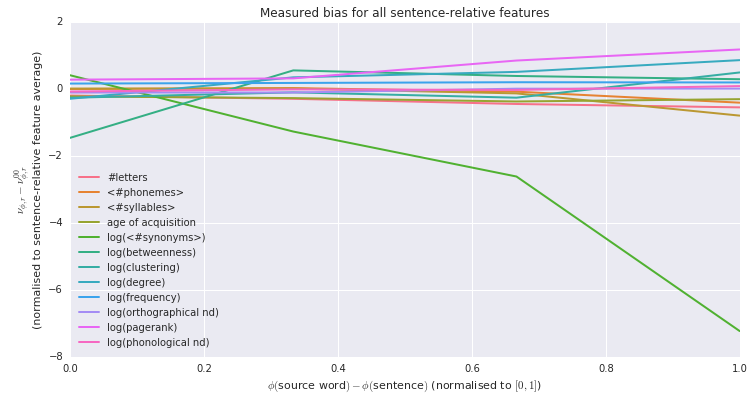

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

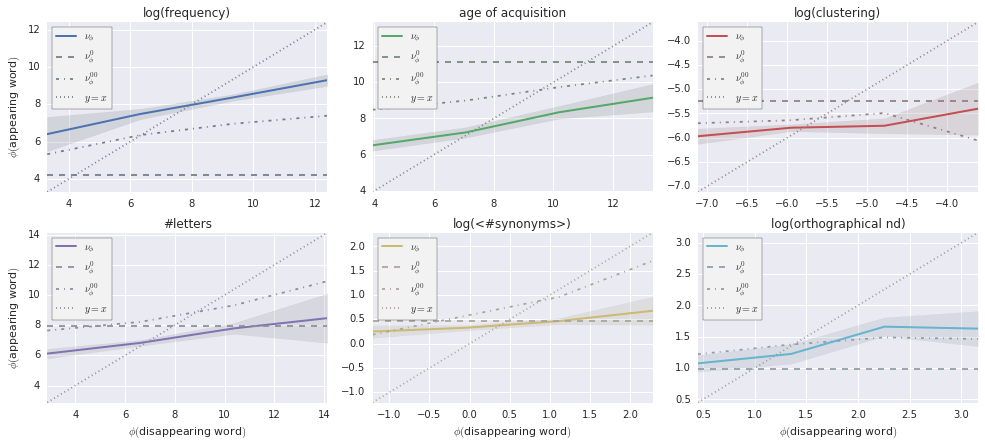

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

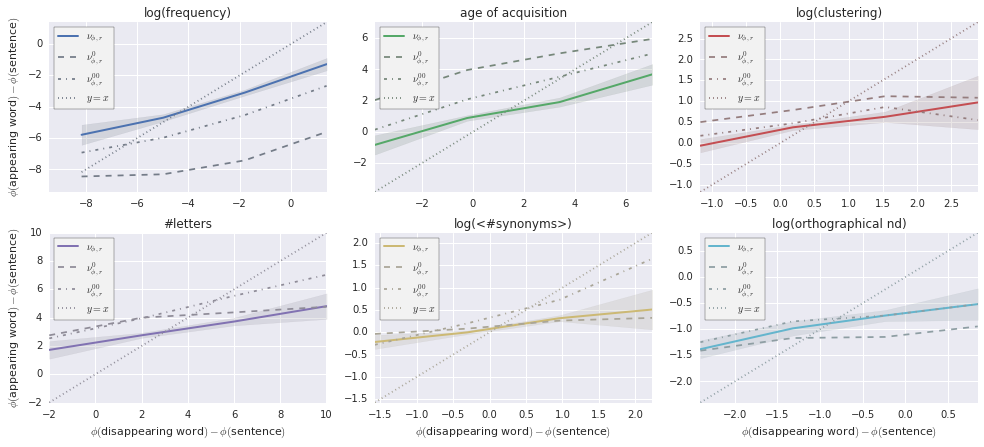

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

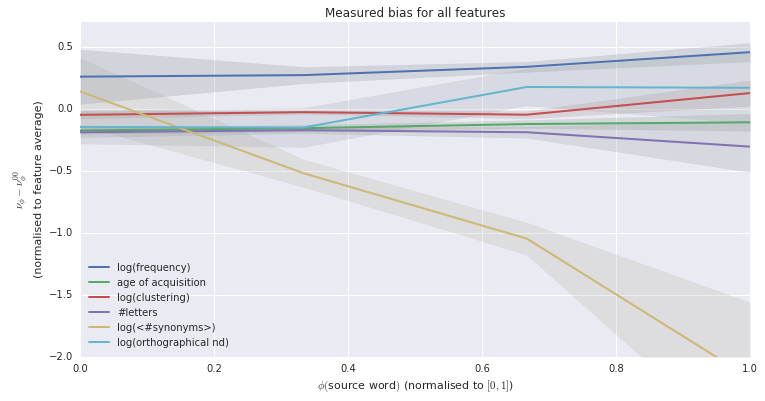

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

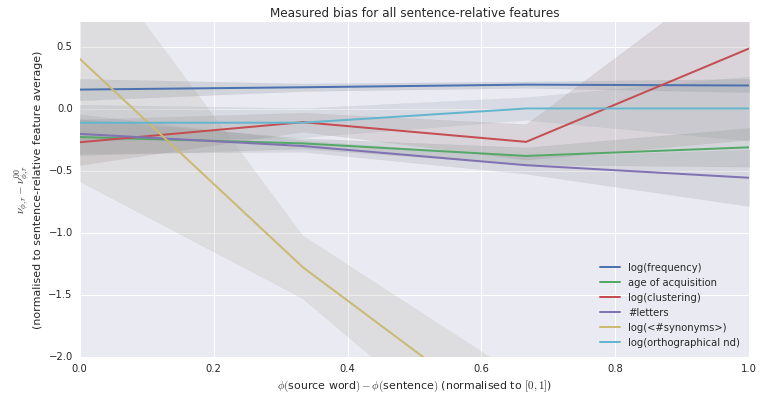

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


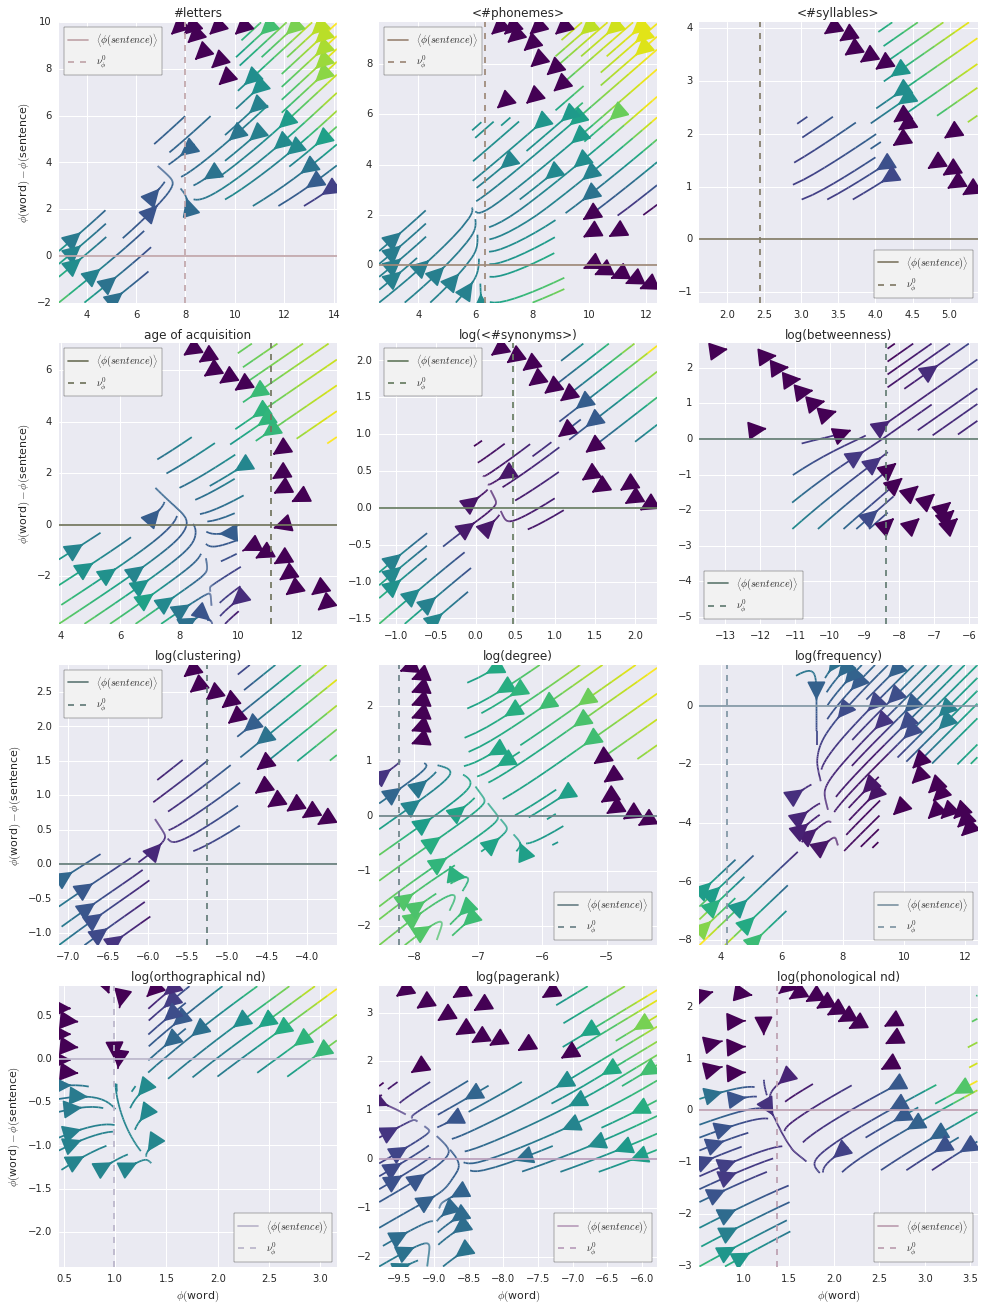

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


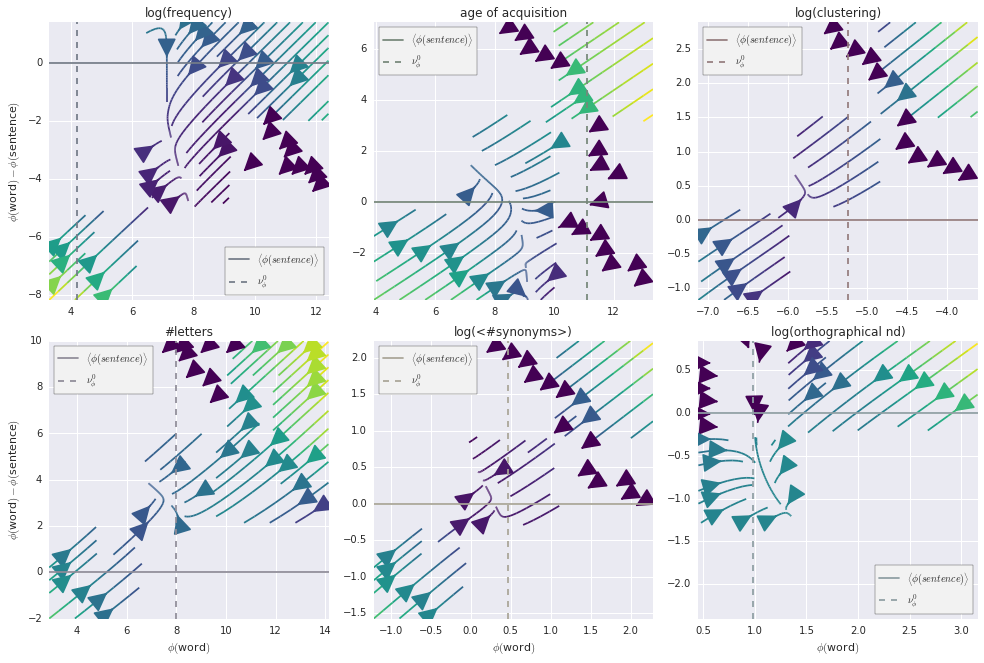

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54397402  0.15760192  0.08664131  0.06671545  0.03601009  0.03161372
  0.02094641  0.01858533  0.01508258  0.00976933  0.00758064]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.452200,0.312340,-0.085075,0.258025,0.223818,-0.420049,0.218441,0.292891,-0.402342,0.273848,-0.164957,0.004942
Component-1,0.290753,-0.399838,0.138971,-0.279161,-0.283238,-0.417188,0.185618,-0.289115,-0.455832,0.226335,-0.164162,0.008766
Component-2,-0.629881,-0.053819,0.103383,-0.031695,-0.752053,0.128587,0.021146,-0.014262,0.043986,-0.049928,-0.012339,0.036218


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19524) |           | Elapsed Time: 0:00:38 ETA:  8 days, 18:19:27

  0% (  125 of 19524) |                    | Elapsed Time: 0:00:39 ETA:  0:01:58

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:40 ETA:  0:01:44

  1% (  352 of 19524) |                    | Elapsed Time: 0:00:41 ETA:  0:01:55

  2% (  445 of 19524) |                    | Elapsed Time: 0:00:42 ETA:  0:02:05

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:42 ETA:  0:02:01

  3% (  656 of 19524) |                    | Elapsed Time: 0:00:43 ETA:  0:01:48

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:44 ETA:  0:01:47

  4% (  861 of 19524) |                    | Elapsed Time: 0:00:45 ETA:  0:01:46

  4% (  865 of 19524) |                    | Elapsed Time: 0:00:48 ETA:  0:02:46

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:49 ETA:  0:02:44

  5% ( 1122 of 19524) |#                   | Elapsed Time: 0:00:50 ETA:  0:02:41

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:50 ETA:  0:02:36

  6% ( 1362 of 19524) |#                   | Elapsed Time: 0:00:51 ETA:  0:02:24

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:52 ETA:  0:02:19

  8% ( 1617 of 19524) |#                   | Elapsed Time: 0:00:53 ETA:  0:02:21

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:54 ETA:  0:02:18

  9% ( 1859 of 19524) |#                   | Elapsed Time: 0:00:55 ETA:  0:02:13

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:55 ETA:  0:01:18

 10% ( 2093 of 19524) |##                  | Elapsed Time: 0:00:56 ETA:  0:01:17

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:00:57 ETA:  0:01:18

 11% ( 2323 of 19524) |##                  | Elapsed Time: 0:00:58 ETA:  0:01:19

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:00:59 ETA:  0:01:26

 13% ( 2539 of 19524) |##                  | Elapsed Time: 0:01:00 ETA:  0:01:34

 13% ( 2648 of 19524) |##                  | Elapsed Time: 0:01:01 ETA:  0:01:38

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:41

 14% ( 2824 of 19524) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:39

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:01:03 ETA:  0:01:42

 15% ( 3048 of 19524) |###                 | Elapsed Time: 0:01:04 ETA:  0:01:42

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:01:05 ETA:  0:01:39

 17% ( 3333 of 19524) |###                 | Elapsed Time: 0:01:06 ETA:  0:01:27

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:01:07 ETA:  0:01:23

 18% ( 3584 of 19524) |###                 | Elapsed Time: 0:01:08 ETA:  0:01:12

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:01:08 ETA:  0:01:06

 19% ( 3832 of 19524) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:02

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:01:10 ETA:  0:01:00

 20% ( 4077 of 19524) |####                | Elapsed Time: 0:01:11 ETA:  0:00:54

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:01:11 ETA:  0:00:48

 22% ( 4301 of 19524) |####                | Elapsed Time: 0:01:12 ETA:  0:00:46

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:01:13 ETA:  0:00:46

 23% ( 4553 of 19524) |####                | Elapsed Time: 0:01:14 ETA:  0:00:45

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:01:14 ETA:  0:00:44

 24% ( 4802 of 19524) |####                | Elapsed Time: 0:01:15 ETA:  0:00:43

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:01:16 ETA:  0:00:46

 25% ( 4989 of 19524) |#####               | Elapsed Time: 0:01:17 ETA:  0:00:51

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:01:18 ETA:  0:00:56

 26% ( 5248 of 19524) |#####               | Elapsed Time: 0:01:19 ETA:  0:01:00

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:01:20 ETA:  0:01:03

 28% ( 5524 of 19524) |#####               | Elapsed Time: 0:01:21 ETA:  0:01:02

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:01:22 ETA:  0:01:04

 29% ( 5734 of 19524) |#####               | Elapsed Time: 0:01:23 ETA:  0:01:10

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:23 ETA:  0:01:06

 30% ( 5949 of 19524) |######              | Elapsed Time: 0:01:24 ETA:  0:01:08

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:26 ETA:  0:01:05

 32% ( 6250 of 19524) |######              | Elapsed Time: 0:01:27 ETA:  0:01:00

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:01:27 ETA:  0:00:57

 33% ( 6498 of 19524) |######              | Elapsed Time: 0:01:28 ETA:  0:00:56

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:01:29 ETA:  0:00:54

 34% ( 6738 of 19524) |######              | Elapsed Time: 0:01:30 ETA:  0:00:49

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:01:31 ETA:  0:00:50

 35% ( 6956 of 19524) |#######             | Elapsed Time: 0:01:32 ETA:  0:00:45

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:01:33 ETA:  0:00:48

 36% ( 7207 of 19524) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:50

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:52

 38% ( 7478 of 19524) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:51

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:51

 39% ( 7689 of 19524) |#######             | Elapsed Time: 0:01:37 ETA:  0:00:54

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:01:38 ETA:  0:00:56

 40% ( 7928 of 19524) |########            | Elapsed Time: 0:01:39 ETA:  0:00:56

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:01:40 ETA:  0:00:51

 41% ( 8172 of 19524) |########            | Elapsed Time: 0:01:41 ETA:  0:00:52

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:01:42 ETA:  0:00:51

 43% ( 8430 of 19524) |########            | Elapsed Time: 0:01:43 ETA:  0:00:54

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:01:44 ETA:  0:00:51

 44% ( 8677 of 19524) |########            | Elapsed Time: 0:01:45 ETA:  0:00:48

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:01:46 ETA:  0:00:44

 45% ( 8909 of 19524) |#########           | Elapsed Time: 0:01:47 ETA:  0:00:42

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:01:48 ETA:  0:00:42

 46% ( 9171 of 19524) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:37

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:32

 48% ( 9422 of 19524) |#########           | Elapsed Time: 0:01:50 ETA:  0:00:29

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:01:51 ETA:  0:00:28

 49% ( 9651 of 19524) |#########           | Elapsed Time: 0:01:52 ETA:  0:00:29

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:01:53 ETA:  0:00:28

 50% ( 9888 of 19524) |##########          | Elapsed Time: 0:01:54 ETA:  0:00:30

 51% (10007 of 19524) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:30

 51% (10137 of 19524) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:31

 52% (10251 of 19524) |##########          | Elapsed Time: 0:01:57 ETA:  0:00:31

 53% (10398 of 19524) |##########          | Elapsed Time: 0:01:58 ETA:  0:00:30

 53% (10495 of 19524) |##########          | Elapsed Time: 0:01:59 ETA:  0:00:28

 54% (10643 of 19524) |##########          | Elapsed Time: 0:02:00 ETA:  0:00:25

 55% (10739 of 19524) |###########         | Elapsed Time: 0:02:00 ETA:  0:00:24

 55% (10867 of 19524) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:22

 56% (10983 of 19524) |###########         | Elapsed Time: 0:02:02 ETA:  0:00:20

 56% (11119 of 19524) |###########         | Elapsed Time: 0:02:03 ETA:  0:00:19

 57% (11227 of 19524) |###########         | Elapsed Time: 0:02:04 ETA:  0:00:17

 58% (11358 of 19524) |###########         | Elapsed Time: 0:02:05 ETA:  0:00:17

 58% (11471 of 19524) |###########         | Elapsed Time: 0:02:06 ETA:  0:00:18

 59% (11612 of 19524) |###########         | Elapsed Time: 0:02:07 ETA:  0:00:18

 60% (11715 of 19524) |############        | Elapsed Time: 0:02:08 ETA:  0:00:19

 60% (11851 of 19524) |############        | Elapsed Time: 0:02:09 ETA:  0:00:18

 61% (11959 of 19524) |############        | Elapsed Time: 0:02:09 ETA:  0:00:14

 61% (12099 of 19524) |############        | Elapsed Time: 0:02:10 ETA:  0:00:10

 62% (12203 of 19524) |############        | Elapsed Time: 0:02:11 ETA:  0:00:10

 63% (12336 of 19524) |############        | Elapsed Time: 0:02:12 ETA:  0:00:10

 63% (12447 of 19524) |############        | Elapsed Time: 0:02:13 ETA:  0:00:08

 64% (12570 of 19524) |############        | Elapsed Time: 0:02:14 ETA:  0:00:08

 65% (12691 of 19524) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:09

 65% (12846 of 19524) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:06

 66% (12935 of 19524) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:04

 66% (13063 of 19524) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:06

 67% (13179 of 19524) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:08

 68% (13307 of 19524) |#############       | Elapsed Time: 0:02:19 ETA:  0:00:07

 68% (13423 of 19524) |#############       | Elapsed Time: 0:02:20 ETA:  0:00:07

 69% (13562 of 19524) |#############       | Elapsed Time: 0:02:21 ETA:  0:00:06

 70% (13667 of 19524) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:02

 70% (13771 of 19524) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:04

 71% (13911 of 19524) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:10

 71% (14024 of 19524) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:12

 72% (14155 of 19524) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:09

 73% (14291 of 19524) |##############      | Elapsed Time: 0:02:27 ETA:  0:00:06

 73% (14399 of 19524) |##############      | Elapsed Time: 0:02:28 ETA:  0:00:02

 74% (14537 of 19524) |##############      | Elapsed Time: 0:02:29 ETA:  0:00:02

 75% (14644 of 19524) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:04

 75% (14775 of 19524) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:00

 76% (14888 of 19524) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:00

 76% (15029 of 19524) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:00

 77% (15132 of 19524) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:00

 78% (15262 of 19524) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:00

 78% (15376 of 19524) |###############     | Elapsed Time: 0:02:35 ETA:  0:00:00

 79% (15515 of 19524) |###############     | Elapsed Time: 0:02:36 ETA:  0:00:00

 80% (15620 of 19524) |################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 80% (15750 of 19524) |################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 81% (15864 of 19524) |################    | Elapsed Time: 0:02:39 ETA:  0:00:00

 81% (15989 of 19524) |################    | Elapsed Time: 0:02:40 ETA:  0:00:00

 82% (16108 of 19524) |################    | Elapsed Time: 0:02:41 ETA:  0:00:00

 83% (16243 of 19524) |################    | Elapsed Time: 0:02:42 ETA:  0:00:00

 83% (16352 of 19524) |################    | Elapsed Time: 0:02:43 ETA:  0:00:00

 84% (16477 of 19524) |################    | Elapsed Time: 0:02:44 ETA:  0:00:00

 85% (16596 of 19524) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:00

 85% (16739 of 19524) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:00

 86% (16840 of 19524) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:00

 86% (16981 of 19524) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:00

 87% (17084 of 19524) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:00

 88% (17201 of 19524) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:00

 88% (17328 of 19524) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:00

 89% (17468 of 19524) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:00

 90% (17572 of 19524) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 90% (17713 of 19524) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 91% (17816 of 19524) |##################  | Elapsed Time: 0:02:54 ETA:  0:00:00

 91% (17943 of 19524) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 92% (18060 of 19524) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 93% (18198 of 19524) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:00

 93% (18304 of 19524) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:00

 94% (18427 of 19524) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:00

 94% (18519 of 19524) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 95% (18669 of 19524) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

 96% (18899 of 19524) |################### | Elapsed Time: 0:03:03 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:03:04 ETA:  0:00:00

 97% (19118 of 19524) |################### | Elapsed Time: 0:03:05 ETA:  0:00:00

 98% (19246 of 19524) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 99% (19383 of 19524) |################### | Elapsed Time: 0:03:07 ETA:  0:00:00

 99% (19473 of 19524) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:03:09 Time: 0:03:09


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

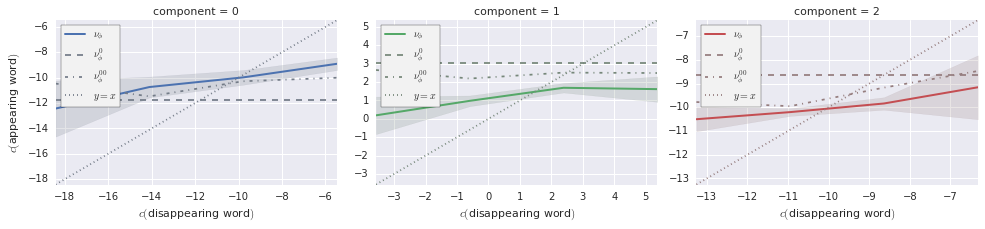

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.55642922  0.17305122  0.1577154 ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.696512,-0.106415,0.330078,-0.557471,0.289263,0.012171
Component-1,0.425424,0.114795,-0.490388,-0.691345,0.294767,-0.022595
Component-2,-0.567984,0.099281,-0.786870,0.215657,-0.019227,0.038667


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 19524) |            | Elapsed Time: 0:00:14 ETA:  3 days, 5:05:40

  0% (   96 of 19524) |                    | Elapsed Time: 0:00:15 ETA:  0:03:10

  1% (  215 of 19524) |                    | Elapsed Time: 0:00:16 ETA:  0:02:46

  1% (  245 of 19524) |                    | Elapsed Time: 0:00:16 ETA:  0:02:42

  1% (  346 of 19524) |                    | Elapsed Time: 0:00:17 ETA:  0:02:46

  2% (  429 of 19524) |                    | Elapsed Time: 0:00:18 ETA:  0:02:55

  2% (  489 of 19524) |                    | Elapsed Time: 0:00:19 ETA:  0:02:52

  3% (  643 of 19524) |                    | Elapsed Time: 0:00:20 ETA:  0:02:36

  3% (  733 of 19524) |                    | Elapsed Time: 0:00:20 ETA:  0:02:35

  4% (  860 of 19524) |                    | Elapsed Time: 0:00:21 ETA:  0:02:31

  5% (  977 of 19524) |#                   | Elapsed Time: 0:00:22 ETA:  0:02:22

  5% ( 1118 of 19524) |#                   | Elapsed Time: 0:00:23 ETA:  0:02:17

  6% ( 1221 of 19524) |#                   | Elapsed Time: 0:00:24 ETA:  0:02:17

  6% ( 1325 of 19524) |#                   | Elapsed Time: 0:00:25 ETA:  0:02:15

  7% ( 1465 of 19524) |#                   | Elapsed Time: 0:00:26 ETA:  0:02:08

  8% ( 1569 of 19524) |#                   | Elapsed Time: 0:00:27 ETA:  0:02:15

  8% ( 1686 of 19524) |#                   | Elapsed Time: 0:00:28 ETA:  0:02:13

  8% ( 1709 of 19524) |#                   | Elapsed Time: 0:00:28 ETA:  0:02:15

  9% ( 1819 of 19524) |#                   | Elapsed Time: 0:00:29 ETA:  0:02:19

  9% ( 1926 of 19524) |#                   | Elapsed Time: 0:00:31 ETA:  0:02:25

 10% ( 1953 of 19524) |##                  | Elapsed Time: 0:00:31 ETA:  0:02:26

 10% ( 2085 of 19524) |##                  | Elapsed Time: 0:00:32 ETA:  0:02:18

 11% ( 2197 of 19524) |##                  | Elapsed Time: 0:00:33 ETA:  0:02:15

 11% ( 2313 of 19524) |##                  | Elapsed Time: 0:00:34 ETA:  0:02:14

 12% ( 2401 of 19524) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:16

 12% ( 2441 of 19524) |##                  | Elapsed Time: 0:00:35 ETA:  0:02:22

 12% ( 2516 of 19524) |##                  | Elapsed Time: 0:00:36 ETA:  0:02:28

 13% ( 2591 of 19524) |##                  | Elapsed Time: 0:00:37 ETA:  0:02:36

 13% ( 2685 of 19524) |##                  | Elapsed Time: 0:00:38 ETA:  0:02:35

 14% ( 2804 of 19524) |##                  | Elapsed Time: 0:00:39 ETA:  0:02:31

 15% ( 2929 of 19524) |###                 | Elapsed Time: 0:00:40 ETA:  0:02:41

 15% ( 3044 of 19524) |###                 | Elapsed Time: 0:00:41 ETA:  0:02:40

 16% ( 3173 of 19524) |###                 | Elapsed Time: 0:00:42 ETA:  0:02:23

 17% ( 3321 of 19524) |###                 | Elapsed Time: 0:00:43 ETA:  0:02:05

 17% ( 3417 of 19524) |###                 | Elapsed Time: 0:00:44 ETA:  0:01:52

 18% ( 3530 of 19524) |###                 | Elapsed Time: 0:00:45 ETA:  0:01:50

 18% ( 3661 of 19524) |###                 | Elapsed Time: 0:00:46 ETA:  0:01:46

 19% ( 3778 of 19524) |###                 | Elapsed Time: 0:00:47 ETA:  0:01:47

 20% ( 3905 of 19524) |####                | Elapsed Time: 0:00:48 ETA:  0:01:47

 20% ( 4023 of 19524) |####                | Elapsed Time: 0:00:49 ETA:  0:01:48

 21% ( 4149 of 19524) |####                | Elapsed Time: 0:00:50 ETA:  0:01:56

 21% ( 4263 of 19524) |####                | Elapsed Time: 0:00:51 ETA:  0:01:55

 22% ( 4393 of 19524) |####                | Elapsed Time: 0:00:52 ETA:  0:01:54

 23% ( 4545 of 19524) |####                | Elapsed Time: 0:00:53 ETA:  0:01:46

 23% ( 4637 of 19524) |####                | Elapsed Time: 0:00:54 ETA:  0:01:38

 24% ( 4772 of 19524) |####                | Elapsed Time: 0:00:55 ETA:  0:01:36

 25% ( 4882 of 19524) |#####               | Elapsed Time: 0:00:56 ETA:  0:01:34

 25% ( 4982 of 19524) |#####               | Elapsed Time: 0:00:57 ETA:  0:01:37

 26% ( 5081 of 19524) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:40

 26% ( 5126 of 19524) |#####               | Elapsed Time: 0:00:58 ETA:  0:01:38

 26% ( 5231 of 19524) |#####               | Elapsed Time: 0:00:59 ETA:  0:01:40

 27% ( 5370 of 19524) |#####               | Elapsed Time: 0:01:00 ETA:  0:01:45

 28% ( 5507 of 19524) |#####               | Elapsed Time: 0:01:01 ETA:  0:01:45

 28% ( 5614 of 19524) |#####               | Elapsed Time: 0:01:02 ETA:  0:01:44

 29% ( 5743 of 19524) |#####               | Elapsed Time: 0:01:03 ETA:  0:01:42

 30% ( 5858 of 19524) |######              | Elapsed Time: 0:01:04 ETA:  0:01:33

 30% ( 5954 of 19524) |######              | Elapsed Time: 0:01:05 ETA:  0:01:33

 31% ( 6079 of 19524) |######              | Elapsed Time: 0:01:06 ETA:  0:01:31

 31% ( 6102 of 19524) |######              | Elapsed Time: 0:01:06 ETA:  0:01:28

 31% ( 6241 of 19524) |######              | Elapsed Time: 0:01:07 ETA:  0:01:23

 32% ( 6346 of 19524) |######              | Elapsed Time: 0:01:08 ETA:  0:01:24

 33% ( 6492 of 19524) |######              | Elapsed Time: 0:01:09 ETA:  0:01:21

 33% ( 6590 of 19524) |######              | Elapsed Time: 0:01:09 ETA:  0:01:20

 34% ( 6738 of 19524) |######              | Elapsed Time: 0:01:10 ETA:  0:01:16

 35% ( 6834 of 19524) |#######             | Elapsed Time: 0:01:11 ETA:  0:01:16

 35% ( 6957 of 19524) |#######             | Elapsed Time: 0:01:12 ETA:  0:01:12

 36% ( 7078 of 19524) |#######             | Elapsed Time: 0:01:13 ETA:  0:01:11

 36% ( 7210 of 19524) |#######             | Elapsed Time: 0:01:14 ETA:  0:01:11

 37% ( 7322 of 19524) |#######             | Elapsed Time: 0:01:15 ETA:  0:01:10

 38% ( 7474 of 19524) |#######             | Elapsed Time: 0:01:16 ETA:  0:01:09

 38% ( 7566 of 19524) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:09

 39% ( 7690 of 19524) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:12

 40% ( 7810 of 19524) |########            | Elapsed Time: 0:01:19 ETA:  0:01:13

 40% ( 7935 of 19524) |########            | Elapsed Time: 0:01:20 ETA:  0:01:12

 41% ( 8054 of 19524) |########            | Elapsed Time: 0:01:21 ETA:  0:01:09

 41% ( 8179 of 19524) |########            | Elapsed Time: 0:01:22 ETA:  0:01:08

 42% ( 8298 of 19524) |########            | Elapsed Time: 0:01:23 ETA:  0:01:08

 43% ( 8441 of 19524) |########            | Elapsed Time: 0:01:24 ETA:  0:01:04

 43% ( 8542 of 19524) |########            | Elapsed Time: 0:01:24 ETA:  0:01:04

 44% ( 8694 of 19524) |########            | Elapsed Time: 0:01:25 ETA:  0:01:00

 45% ( 8786 of 19524) |#########           | Elapsed Time: 0:01:26 ETA:  0:00:56

 45% ( 8916 of 19524) |#########           | Elapsed Time: 0:01:27 ETA:  0:00:54

 46% ( 9030 of 19524) |#########           | Elapsed Time: 0:01:28 ETA:  0:00:52

 47% ( 9181 of 19524) |#########           | Elapsed Time: 0:01:29 ETA:  0:00:48

 47% ( 9274 of 19524) |#########           | Elapsed Time: 0:01:29 ETA:  0:00:44

 48% ( 9426 of 19524) |#########           | Elapsed Time: 0:01:30 ETA:  0:00:40

 48% ( 9518 of 19524) |#########           | Elapsed Time: 0:01:31 ETA:  0:00:41

 49% ( 9648 of 19524) |#########           | Elapsed Time: 0:01:32 ETA:  0:00:44

 50% ( 9763 of 19524) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:44

 50% ( 9894 of 19524) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:46

 51% (10007 of 19524) |##########          | Elapsed Time: 0:01:35 ETA:  0:00:46

 51% (10146 of 19524) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:45

 52% (10251 of 19524) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:45

 53% (10402 of 19524) |##########          | Elapsed Time: 0:01:37 ETA:  0:00:44

 53% (10495 of 19524) |##########          | Elapsed Time: 0:01:38 ETA:  0:00:43

 54% (10646 of 19524) |##########          | Elapsed Time: 0:01:39 ETA:  0:00:39

 55% (10739 of 19524) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:38

 55% (10870 of 19524) |###########         | Elapsed Time: 0:01:41 ETA:  0:00:38

 56% (10983 of 19524) |###########         | Elapsed Time: 0:01:42 ETA:  0:00:38

 56% (11128 of 19524) |###########         | Elapsed Time: 0:01:43 ETA:  0:00:35

 57% (11227 of 19524) |###########         | Elapsed Time: 0:01:43 ETA:  0:00:34

 58% (11355 of 19524) |###########         | Elapsed Time: 0:01:44 ETA:  0:00:36

 58% (11471 of 19524) |###########         | Elapsed Time: 0:01:45 ETA:  0:00:37

 59% (11611 of 19524) |###########         | Elapsed Time: 0:01:46 ETA:  0:00:37

 60% (11715 of 19524) |############        | Elapsed Time: 0:01:47 ETA:  0:00:38

 60% (11845 of 19524) |############        | Elapsed Time: 0:01:48 ETA:  0:00:38

 61% (11959 of 19524) |############        | Elapsed Time: 0:01:49 ETA:  0:00:37

 61% (12100 of 19524) |############        | Elapsed Time: 0:01:50 ETA:  0:00:33

 62% (12203 of 19524) |############        | Elapsed Time: 0:01:51 ETA:  0:00:34

 63% (12340 of 19524) |############        | Elapsed Time: 0:01:52 ETA:  0:00:33

 63% (12447 of 19524) |############        | Elapsed Time: 0:01:53 ETA:  0:00:32

 64% (12578 of 19524) |############        | Elapsed Time: 0:01:54 ETA:  0:00:31

 65% (12691 of 19524) |#############       | Elapsed Time: 0:01:54 ETA:  0:00:30

 65% (12845 of 19524) |#############       | Elapsed Time: 0:01:55 ETA:  0:00:27

 66% (12935 of 19524) |#############       | Elapsed Time: 0:01:56 ETA:  0:00:25

 66% (13068 of 19524) |#############       | Elapsed Time: 0:01:57 ETA:  0:00:24

 67% (13179 of 19524) |#############       | Elapsed Time: 0:01:58 ETA:  0:00:24

 68% (13314 of 19524) |#############       | Elapsed Time: 0:01:59 ETA:  0:00:23

 68% (13423 of 19524) |#############       | Elapsed Time: 0:02:00 ETA:  0:00:23

 69% (13568 of 19524) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:20

 70% (13667 of 19524) |##############      | Elapsed Time: 0:02:01 ETA:  0:00:17

 70% (13776 of 19524) |##############      | Elapsed Time: 0:02:02 ETA:  0:00:20

 71% (13911 of 19524) |##############      | Elapsed Time: 0:02:03 ETA:  0:00:23

 71% (14028 of 19524) |##############      | Elapsed Time: 0:02:04 ETA:  0:00:25

 72% (14155 of 19524) |##############      | Elapsed Time: 0:02:05 ETA:  0:00:22

 73% (14295 of 19524) |##############      | Elapsed Time: 0:02:06 ETA:  0:00:20

 73% (14399 of 19524) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:17

 74% (14539 of 19524) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:17

 75% (14644 of 19524) |###############     | Elapsed Time: 0:02:09 ETA:  0:00:17

 75% (14772 of 19524) |###############     | Elapsed Time: 0:02:10 ETA:  0:00:13

 76% (14888 of 19524) |###############     | Elapsed Time: 0:02:11 ETA:  0:00:12

 76% (14991 of 19524) |###############     | Elapsed Time: 0:02:12 ETA:  0:00:16

 77% (15091 of 19524) |###############     | Elapsed Time: 0:02:13 ETA:  0:00:17

 77% (15132 of 19524) |###############     | Elapsed Time: 0:02:13 ETA:  0:00:21

 78% (15246 of 19524) |###############     | Elapsed Time: 0:02:14 ETA:  0:00:24

 78% (15376 of 19524) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:31

 79% (15517 of 19524) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:28

 80% (15620 of 19524) |################    | Elapsed Time: 0:02:17 ETA:  0:00:28

 80% (15757 of 19524) |################    | Elapsed Time: 0:02:18 ETA:  0:00:26

 81% (15864 of 19524) |################    | Elapsed Time: 0:02:19 ETA:  0:00:19

 81% (16000 of 19524) |################    | Elapsed Time: 0:02:20 ETA:  0:00:11

 82% (16108 of 19524) |################    | Elapsed Time: 0:02:20 ETA:  0:00:06

 83% (16231 of 19524) |################    | Elapsed Time: 0:02:21 ETA:  0:00:04

 83% (16352 of 19524) |################    | Elapsed Time: 0:02:22 ETA:  0:00:01

 84% (16486 of 19524) |################    | Elapsed Time: 0:02:23 ETA:  0:00:00

 85% (16596 of 19524) |#################   | Elapsed Time: 0:02:24 ETA:  0:00:00

 85% (16741 of 19524) |#################   | Elapsed Time: 0:02:25 ETA:  0:00:00

 86% (16840 of 19524) |#################   | Elapsed Time: 0:02:26 ETA:  0:00:00

 87% (16986 of 19524) |#################   | Elapsed Time: 0:02:27 ETA:  0:00:00

 87% (17084 of 19524) |#################   | Elapsed Time: 0:02:28 ETA:  0:00:00

 88% (17218 of 19524) |#################   | Elapsed Time: 0:02:29 ETA:  0:00:00

 88% (17328 of 19524) |#################   | Elapsed Time: 0:02:29 ETA:  0:00:00

 89% (17475 of 19524) |#################   | Elapsed Time: 0:02:30 ETA:  0:00:00

 90% (17572 of 19524) |##################  | Elapsed Time: 0:02:31 ETA:  0:00:00

 90% (17712 of 19524) |##################  | Elapsed Time: 0:02:32 ETA:  0:00:00

 91% (17816 of 19524) |##################  | Elapsed Time: 0:02:33 ETA:  0:00:00

 91% (17939 of 19524) |##################  | Elapsed Time: 0:02:34 ETA:  0:00:00

 92% (18060 of 19524) |##################  | Elapsed Time: 0:02:35 ETA:  0:00:00

 93% (18183 of 19524) |##################  | Elapsed Time: 0:02:36 ETA:  0:00:00

 93% (18304 of 19524) |##################  | Elapsed Time: 0:02:37 ETA:  0:00:00

 94% (18448 of 19524) |##################  | Elapsed Time: 0:02:38 ETA:  0:00:00

 95% (18548 of 19524) |################### | Elapsed Time: 0:02:38 ETA:  0:00:00

 95% (18691 of 19524) |################### | Elapsed Time: 0:02:39 ETA:  0:00:00

 96% (18792 of 19524) |################### | Elapsed Time: 0:02:40 ETA:  0:00:00

 96% (18932 of 19524) |################### | Elapsed Time: 0:02:41 ETA:  0:00:00

 97% (19036 of 19524) |################### | Elapsed Time: 0:02:42 ETA:  0:00:00

 98% (19151 of 19524) |################### | Elapsed Time: 0:02:43 ETA:  0:00:00

 98% (19280 of 19524) |################### | Elapsed Time: 0:02:44 ETA:  0:00:00

 99% (19419 of 19524) |################### | Elapsed Time: 0:02:45 ETA:  0:00:00

100% (19524 of 19524) |####################| Elapsed Time: 0:02:45 Time: 0:02:45


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

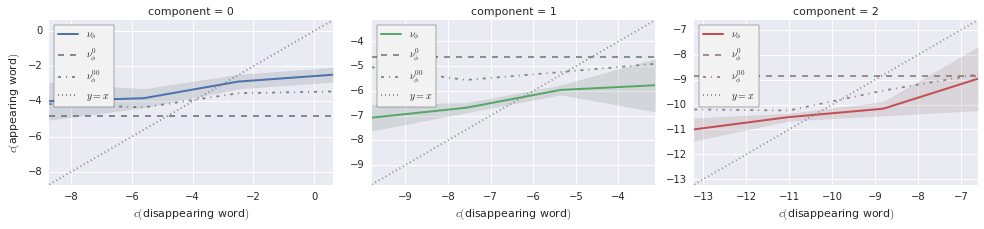

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1439 (cluster-unique) substitutions, but the PCA is in fact computed on 487 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.